<a href="https://colab.research.google.com/github/Akshayakrishna262/mlapplications/blob/main/ToyotaCar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as smf
import statsmodels.formula.api as smf

In [ ]:
import pandas as pd
from google.colab import files
uploaded=files.upload()
file_name=list(uploaded.keys())[0]
df=pd.read_csv(file_name)

Saving Toyoto_Corrola.csv to Toyoto_Corrola.csv


In [ ]:
df.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,257,13500,23,46986,90,3,4,5,1165
1,2,257,13750,23,72937,90,3,4,5,1165
2,3,365,13950,24,41711,90,3,4,5,1165
3,4,257,14950,26,48000,90,3,4,5,1165
4,5,256,13750,30,38500,90,3,4,5,1170


In [ ]:
df.dropna(inplace=True)

In [ ]:
features = ['Age_08_04', 'Doors', 'HP', 'Cylinders']

In [ ]:
X = df[features]
y = df['Price']

In [ ]:
print(df['Model'].unique()[:15])

NameError: name 'df' is not defined

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['Model'] = LE.fit_transform(df['Model'])
df.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,257,13500,23,46986,90,3,4,5,1165
1,2,257,13750,23,72937,90,3,4,5,1165
2,3,365,13950,24,41711,90,3,4,5,1165
3,4,257,14950,26,48000,90,3,4,5,1165
4,5,256,13750,30,38500,90,3,4,5,1170


In [ ]:
import statsmodels.formula.api as smf
model = smf.ols('Model ~ Price + Age_08_04 + KM + Doors + Cylinders + Gears + Weight', data=df).fit()

In [ ]:
model.params

,0
Intercept,-32.717743
Price,-0.003746
Age_08_04,-1.640542
KM,0.000369
Doors,-0.224347
Cylinders,-130.870973
Gears,-15.445533
Weight,0.810768


In [ ]:
print(model.tvalues,'\n',model.pvalues)

Intercept    -6.799200
Price        -2.386094
Age_08_04    -6.612911
KM            4.605578
Doors        -0.091353
Cylinders    -6.799200
Gears        -1.291493
Weight       13.660336
dtype: float64 
 Intercept    1.541098e-11
Price        1.715795e-02
Age_08_04    5.309256e-11
KM           4.478947e-06
Doors        9.272253e-01
Cylinders    1.541098e-11
Gears        1.967416e-01
Weight       5.079673e-40
dtype: float64


In [ ]:
(model.rsquared,model.rsquared_adj)

(0.28230458705773165, 0.2792911703483869)

In [ ]:
ml_price=smf.ols('Model ~ Price',data=df).fit()
print(ml_price.tvalues,'\n',ml_price.pvalues)

Intercept     5.173805
Price        12.121866
dtype: float64 
 Intercept    2.618725e-07
Price        2.884397e-32
dtype: float64


In [ ]:
(ml_price.rsquared,ml_price.rsquared_adj)

(0.09294449501527913, 0.09231195979562457)

In [ ]:
ml_age=smf.ols('Model ~ Age_08_04',data=df).fit()
print(ml_age.tvalues,'\n',ml_age.pvalues)

Intercept    28.780142
Age_08_04   -12.923525
dtype: float64 
 Intercept    3.758166e-144
Age_08_04     3.203333e-36
dtype: float64


In [ ]:
(ml_age.rsquared,ml_age.rsquared_adj)

(0.10431959281151737, 0.10369499001710425)

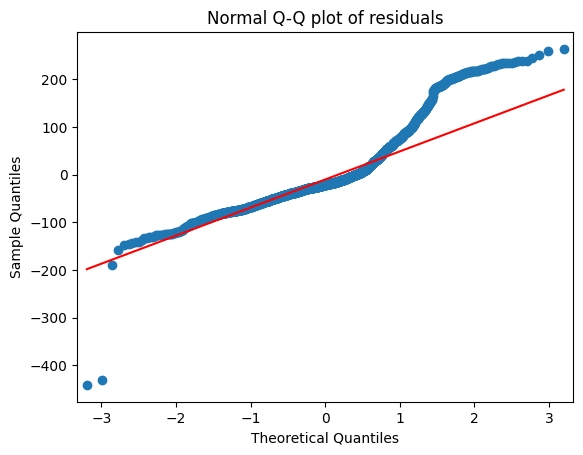

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
def get_standardized_values( vals ):
  return (vals - vals.mean())/vals.std()

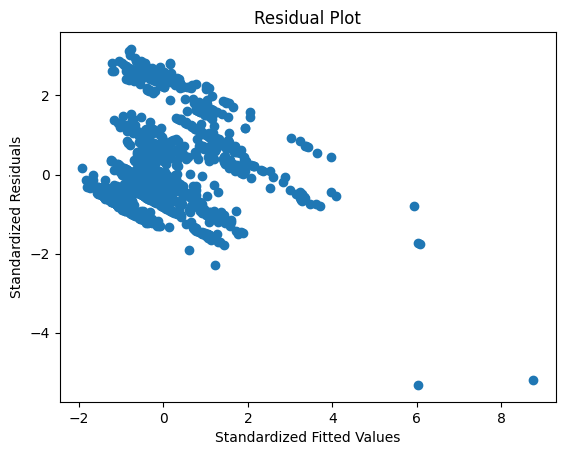

In [ ]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residuals')
plt.show()

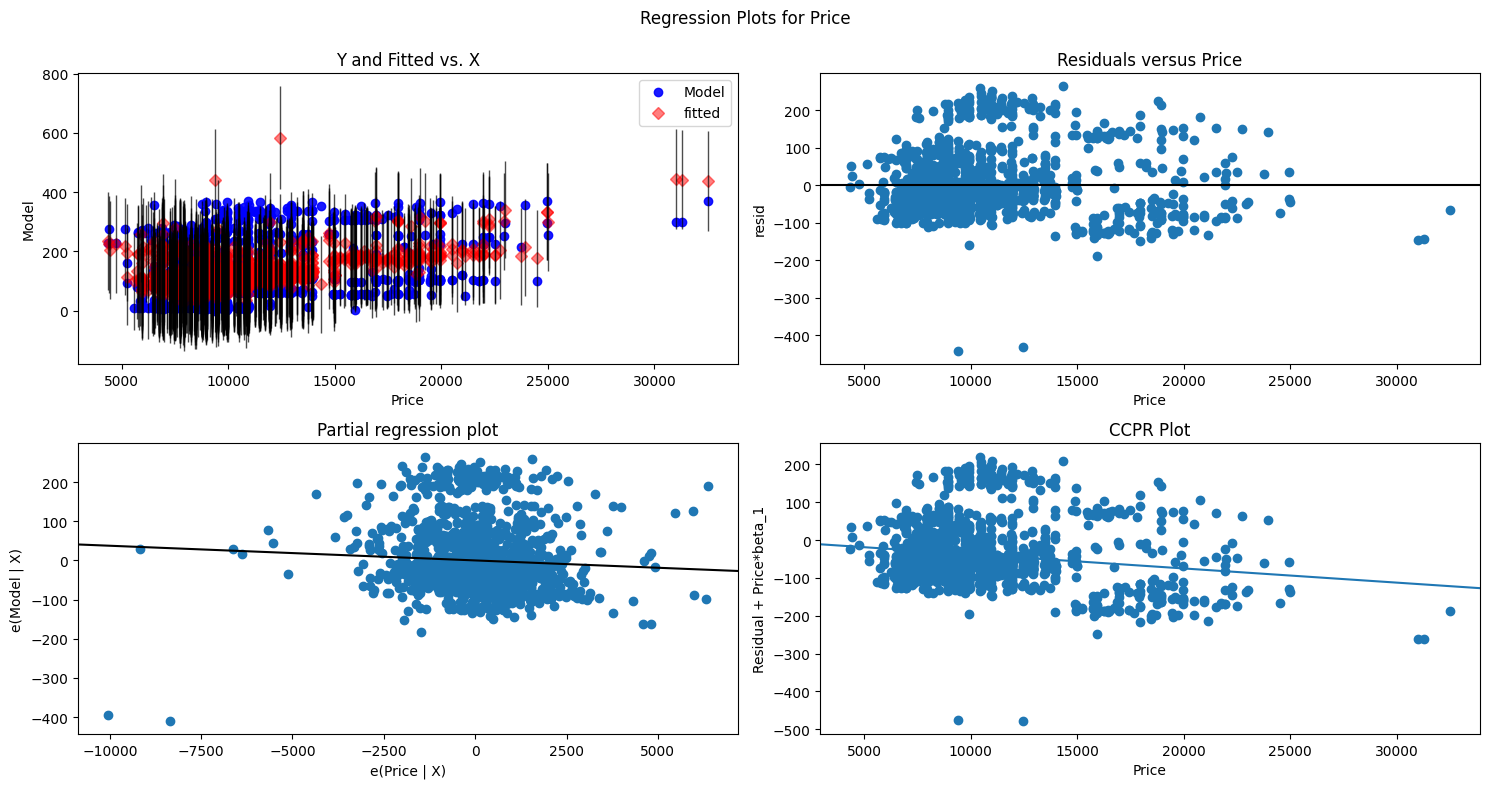

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Price", fig=fig)
plt.show()

In [ ]:
import pandas as pd

from google.colab import files
uploaded = files.upload()
file_name=list(uploaded.keys())[0]
cars_new = pd .read_csv(file_name)
cars_new

Saving Toyoto_Corrola.csv to Toyoto_Corrola (1).csv


,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [ ]:
car1 = cars_new.drop(cars_new.index[[956,991,960,221,654]],axis=0).reset_index()

In [ ]:
car1 = car1.drop(['index'],axis=1)
car1

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1426,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1427,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1428,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1429,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [ ]:
final_price1 = smf.ols('Price~KM+Age_08_04+Gears+Weight+Doors',data=car1).fit()

In [ ]:
(final_price1.rsquared,final_price1.aic)

(0.864527675684723, 24671.79291691334)

In [ ]:
final_price2 = smf.ols('Price~KM+Age_08_04',data=car1).fit()

In [ ]:
(final_price2.rsquared,final_price2.aic)

(0.7902642136838732, 25291.256124570147)

In [ ]:
final_price3 = smf.ols('Price~KM+Age_08_04+HP+Weight',data=car1).fit()

In [ ]:
(final_price3.rsquared,final_price3.aic)

(0.8741548209228815, 24564.30681357371)

In [ ]:
final_price4 = smf.ols('Price~KM+Age_08_04+Gears+Weight+HP',data=car1).fit()

In [ ]:
(final_price4.rsquared,final_price4.aic)

(0.8746793357107763, 24560.33003151979)

In [ ]:
final_price5 = smf.ols('Price~KM+Age_08_04+HP+Weight+Doors',data=car1).fit()

In [ ]:
final_price1 = smf.ols('Price~KM+Age_08_04+Gears+Weight+Doors',data=car1).fit()